In [42]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fp = r"C:\Users\Matan\Documents\Projects\Data\Caliber_size_variation"
file_list = os.listdir(fp)
for file in file_list:
    if 'xlsx' in file.split('.')[-1] and '$' not in file:
        xl = file

xl_file_path = os.path.join(fp, xl)
df = pd.read_excel(xl_file_path, sheet_name='filtered')
frames_list = list(df['frame'])
frames_dir = os.path.join(fp,'frames')

In [25]:
df.head()

,diameter,height,dist,frame,id,label,x1_coord,x2_coord,y1_coord,y2_coord,conf,tracking_state,index,x_center,y_center
0,133.972,51.394049,1.053420,639,6472,fruit,1287,1368,818,889,0.9866,OK,5,1327.5,853.5
1,118.854,44.866268,0.896649,640,6472,fruit,1330,1418,819,889,0.9386,OK,5,1374.0,854.0
2,104.667,41.689742,0.785327,641,6472,fruit,1422,1502,820,891,0.9689,OK,5,1462.0,855.5
3,92.820,40.148288,0.744186,642,6472,fruit,1512,1593,817,890,0.9359,OK,5,1552.5,853.5
4,83.689,36.283445,0.726498,643,6472,fruit,1601,1689,819,889,0.8166,OK,5,1645.0,854.0


In [26]:
fids = np.unique(list(df['id']))

In [70]:
def get_df_by_fid(df, fid):
    return df[df['id'] == fid]

def get_sub_image_list(s_df, fp):
    frames_dir = os.path.join(fp,'frames')
    image_list = os.listdir(frames_dir)
    s_f_list = list(s_df['frame'])
    s_img_list = []
    ids = []
    for image in image_list:
        t = image.split('.')[0]
        f_id = int(t.split('_')[-1])
        if f_id in s_f_list:
            s_img_list.append(image)
            ids.append(f_id)
    
    return s_img_list, ids

def get_bb(s):
    x1 = int(s['x1_coord'])
    y1 = int(s['y1_coord'])
    x2 = int(s['x2_coord'])
    y2 = int(s['y2_coord'])
    
    return x1, y1, x2, y2

In [27]:
s_df = get_df_by_fid(df, fids[0])

In [28]:
s_df

,diameter,height,dist,frame,id,label,x1_coord,x2_coord,y1_coord,y2_coord,conf,tracking_state,index,x_center,y_center
0,133.972,51.394049,1.053420,639,6472,fruit,1287,1368,818,889,0.9866,OK,5,1327.5,853.5
1,118.854,44.866268,0.896649,640,6472,fruit,1330,1418,819,889,0.9386,OK,5,1374.0,854.0
2,104.667,41.689742,0.785327,641,6472,fruit,1422,1502,820,891,0.9689,OK,5,1462.0,855.5
3,92.820,40.148288,0.744186,642,6472,fruit,1512,1593,817,890,0.9359,OK,5,1552.5,853.5
4,83.689,36.283445,0.726498,643,6472,fruit,1601,1689,819,889,0.8166,OK,5,1645.0,854.0


In [44]:
s_img_list, ids = get_sub_image_list(s_df,fp)
        

In [92]:
im = cv2.imread(os.path.join(frames_dir, s_img_list[0]))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [106]:
s = s_df[s_df.frame == ids[0]]

In [107]:
x1, y1, x2, y2 = get_bb(s)

In [108]:
x2-x1

81

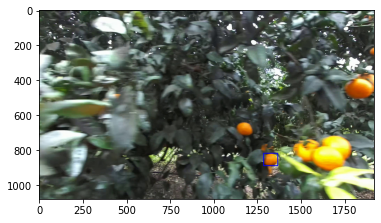

In [95]:
im1 = im.copy()
im1 = cv2.rectangle(im1, (x1,y1), (x2,y2),color=(0,0,255), thickness=3)
plt.imshow(im1)

In [96]:
m = 5
cropped = im[y1 - m:y2 + m, x1 - m:x2 + m]

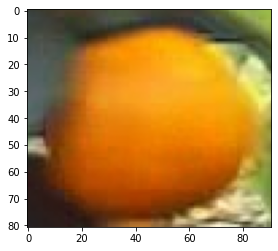

In [97]:
plt.imshow(cropped)

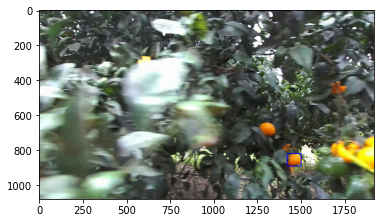

In [112]:
i = 2

im = cv2.imread(os.path.join(frames_dir, s_img_list[i]))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
s = s_df[s_df.frame == ids[i]]
x1, y1, x2, y2 = get_bb(s)
im1 = im.copy()
im1 = cv2.rectangle(im1, (x1,y1), (x2,y2),color=(0,0,255), thickness=3)
plt.imshow(im1)

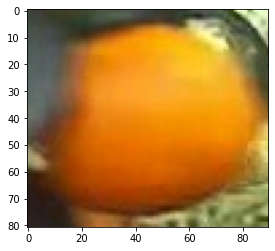

In [115]:
cropped = im[y1 - m:y2 + m, x1 - m:x2 + m]
plt.imshow(cropped)

In [114]:
x2-x1

80